In [352]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [353]:
from google.colab import files
uploaded = files.upload()

Saving glassdoor_jobs.csv to glassdoor_jobs (6).csv


In [358]:
import io
glassdoorjobs = pd.read_csv(io.BytesIO(uploaded['glassdoor_jobs.csv']))

Exploring the Dataset

In [359]:
glassdoorjobs.shape

(956, 15)

In [360]:
glassdoorjobs.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [361]:
glassdoorjobs.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [362]:
glassdoorjobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [363]:
glassdoorjobs.isnull().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name         False
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
dtype: bool

Data Cleaning

In [364]:
# Remove -1 from salary estimates column
print("Before:", glassdoorjobs.shape)
glassdoorjobs=glassdoorjobs[glassdoorjobs['Salary Estimate'] != "-1"]
print("After:",glassdoorjobs.shape)

Before: (956, 15)
After: (742, 15)


In [365]:
# Removing the text value from 'Salary Estimate' column
salary = glassdoorjobs['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary


0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
950    $58K-$111K 
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
955    $61K-$126K 
Name: Salary Estimate, Length: 742, dtype: object

In [366]:
salary = salary.apply(lambda x: x.replace("$","").replace("K",""))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [367]:
salary = salary.loc[0:].str.lower()

In [368]:
salary = salary.str.replace('employer provided salary:'," ")
salary = salary.str.replace('per hour'," ")
salary = salary.str.replace(" ","")
salary = salary.str.replace('Employer est.'," ")

In [369]:
glassdoorjobs['max_salary'] = salary.apply(lambda x: x.split("-")[0])
glassdoorjobs['min_salary'] = salary.apply(lambda x: x.split("-")[1])

In [370]:
glassdoorjobs['max_salary'].head()

0    53
1    63
2    80
3    56
4    86
Name: max_salary, dtype: object

In [371]:
glassdoorjobs['max_salary'].tail()

950    58
951    72
952    56
953    95
955    61
Name: max_salary, dtype: object

In [372]:
glassdoorjobs['max_salary'] = pd.to_numeric(glassdoorjobs['max_salary'], errors='coerce')
glassdoorjobs['min_salary'] = pd.to_numeric(glassdoorjobs['min_salary'], errors='coerce')

In [373]:
glassdoorjobs['max_salary'].dtypes

dtype('int64')

In [374]:
glassdoorjobs['average_salary'] = (glassdoorjobs['max_salary']+glassdoorjobs['min_salary'])/2
glassdoorjobs['average_salary'].head()

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: average_salary, dtype: float64

In [375]:
len(glassdoorjobs['average_salary'])

742

In [376]:
#Removing the unnamed column from dataset
glassdoorjobs.drop(["Unnamed: 0"], axis=1, inplace=True)
glassdoorjobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'max_salary', 'min_salary', 'average_salary'],
      dtype='object')

In [377]:
glassdoorjobs['Salary Estimate'].value_counts()

$49K-$113K (Glassdoor est.)         6
$54K-$115K (Glassdoor est.)         6
$86K-$143K (Glassdoor est.)         6
$21-$34 Per Hour(Glassdoor est.)    6
$81K-$167K (Glassdoor est.)         5
                                   ..
$85K-$159K (Glassdoor est.)         1
$126K-$228K (Glassdoor est.)        1
$112K-$182K (Glassdoor est.)        1
$129K-$215K (Glassdoor est.)        1
$66K-$117K (Glassdoor est.)         1
Name: Salary Estimate, Length: 416, dtype: int64

In [378]:
# Remove numbers from company name column
glassdoorjobs['Company Name'] = glassdoorjobs['Company Name'].apply(lambda x: x.split("\n")[0])
glassdoorjobs['Company Name'].head()

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
Name: Company Name, dtype: object

In [379]:
# Create a column 'Job_State' name
glassdoorjobs["job_state"] = glassdoorjobs["Location"].apply(lambda x: x.split(',')[1])
glassdoorjobs["job_state"].head()

0     NM
1     MD
2     FL
3     WA
4     NY
Name: job_state, dtype: object

In [380]:
glassdoorjobs['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [381]:
# replace Los Angeles with CA
glassdoorjobs['job_state']=glassdoorjobs['job_state'].str.replace('Los Angeles','CA')

In [382]:
glassdoorjobs['job_state'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' UT', ' TN', ' DE', ' ID', ' RI', ' IA', ' SC',
       ' KS'], dtype=object)

In [383]:
glassdoorjobs['job_state'].value_counts()[:5]

 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
Name: job_state, dtype: int64

In [384]:
# Calculating the age of companies
glassdoorjobs['Company_age'] =  glassdoorjobs['Founded'].apply(lambda x: x if x<1 else 2020-x)

In [385]:
glassdoorjobs['Company_age'].head()

0    47
1    36
2    10
3    55
4    22
Name: Company_age, dtype: int64

In [386]:
glassdoorjobs['Job Description'] = glassdoorjobs['Job Description'].loc[0: ].str.lower()

In [387]:
# Cleaning the 'Job Description' columns
glassdoorjobs['python_job'] = np.where(glassdoorjobs['Job Description'].str.contains("python"),1,0)
glassdoorjobs['spark_job'] = np.where(glassdoorjobs['Job Description'].str.contains("spark"),1,0)
glassdoorjobs['excel_job'] = np.where(glassdoorjobs['Job Description'].str.contains("excel"),1,0)
glassdoorjobs['aws_job'] = np.where(glassdoorjobs['Job Description'].str.contains("aws"),1,0)

In [388]:
print(glassdoorjobs['python_job'].value_counts())
print(glassdoorjobs['spark_job'].value_counts())
print(glassdoorjobs['excel_job'].value_counts())
print(glassdoorjobs['aws_job'].value_counts())

1    392
0    350
Name: python_job, dtype: int64
0    575
1    167
Name: spark_job, dtype: int64
1    388
0    354
Name: excel_job, dtype: int64
0    566
1    176
Name: aws_job, dtype: int64


In [389]:
# Dataset as of now
glassdoorjobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,max_salary,min_salary,average_salary,job_state,Company_age,python_job,spark_job,excel_job,aws_job
0,Data Scientist,$53K-$91K (Glassdoor est.),"data scientist\nlocation: albuquerque, nm\nedu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,47,1,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),what you will do:\n\ni. general summary\n\nthe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,36,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"knowbe4, inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,10,1,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*organization and job id**\njob id: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA,55,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),data scientist\naffinity solutions / marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY,22,1,0,1,0


In [390]:
glassdoorjobs['Job Title'] = glassdoorjobs['Job Title'].loc[0: ].str.lower()

In [391]:
def job_title_simple(title):
  if 'data scientist' in title:
    return 'data scientist'
  elif 'data analystist' in title:
    return 'data analystist'
  elif 'data engineer' in title:
    return 'data engineer'
  elif 'machine learning' in title:
    return 'machine learning'
  elif 'manager' in title:
    return 'manager'
  elif 'director' in title:
    return 'director'
  elif 'analyst' in title:
    return 'analyst'
  else:
    return 'na'


In [392]:
  glassdoorjobs['Job_Title_New'] = glassdoorjobs['Job Title'].apply(job_title_simple)

In [393]:
glassdoorjobs['Job_Title_New'].value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
machine learning     22
manager              22
director             14
Name: Job_Title_New, dtype: int64

In [394]:
# Cleaning 'Competitors' column , this column consists majorly -1 so will drop this column

In [395]:
# Cleaning 'Type of Ownership' column
glassdoorjobs['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
-1                                  1
Name: Type of ownership, dtype: int64

In [396]:
glassdoorjobs['Type of ownership'] = glassdoorjobs['Type of ownership'].loc[0: ].str.lower()

In [397]:
def ownership(title):
  if 'private' in title:
    return 'Private'
  elif 'public' in title:
    return 'Public'
  elif 'nonprofit organization' in title:
    return 'NPO'
  elif ('school / school district' in title) or ('college / university' in title):
    return 'college/university'
  elif ('unknown' in title) or ('-1' in title):
    return 'other organization'
  else:
    return title

In [398]:
glassdoorjobs['Type of ownership'] = glassdoorjobs['Type of ownership'].apply(ownership)
glassdoorjobs['Type of ownership'].value_counts()

Private                           410
Public                            193
NPO                                55
subsidiary or business segment     34
college/university                 15
hospital                           15
government                         15
other organization                  5
Name: Type of ownership, dtype: int64

In [399]:
# Cleaning 'Revenue' Column
glassdoorjobs['Revenue'].value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64

In [400]:
def revenue_simplifier(title):
  if '-1' in title:
    return 'Unknown / Non-Applicable'
  else:
    return title


In [401]:
  glassdoorjobs['Revenue'] = glassdoorjobs['Revenue'].apply(revenue_simplifier)
  glassdoorjobs['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [402]:
# Cleaning 'Size' Column
glassdoorjobs['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [403]:
def size(title):
  if '-1' in title:
    return 'Unknown'
  else:
    return title

In [404]:
glassdoorjobs['Size'] = glassdoorjobs['Size'].apply(size)
glassdoorjobs['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: Size, dtype: int64

In [405]:
glassdoorjobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,max_salary,min_salary,average_salary,job_state,Company_age,python_job,spark_job,excel_job,aws_job,Job_Title_New
0,data scientist,$53K-$91K (Glassdoor est.),"data scientist\nlocation: albuquerque, nm\nedu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,47,1,0,1,0,data scientist
1,healthcare data scientist,$63K-$112K (Glassdoor est.),what you will do:\n\ni. general summary\n\nthe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,other organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,36,1,0,0,0,data scientist
2,data scientist,$80K-$90K (Glassdoor est.),"knowbe4, inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL,10,1,1,1,0,data scientist
3,data scientist,$56K-$97K (Glassdoor est.),*organization and job id**\njob id: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA,55,1,0,0,0,data scientist
4,data scientist,$86K-$143K (Glassdoor est.),data scientist\naffinity solutions / marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY,22,1,0,1,0,data scientist


Exploratory Data Analysis

In [406]:
glassdoorjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  max_salary         742 non-null    int64  
 15  min_salary         742 non-null    int64  
 16  average_salary     742 non

Text(0.5, 1.0, 'Company Rating Histogram')

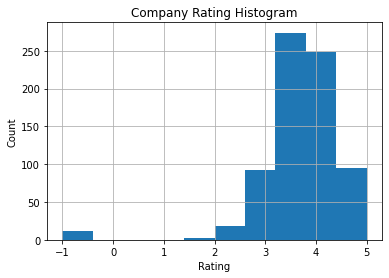

In [407]:
glassdoorjobs['Rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Company Rating Histogram')

In [408]:
glassdoorjobs['Company_age'].describe()

count    742.000000
mean      46.591644
std       53.778815
min       -1.000000
25%       11.000000
50%       24.000000
75%       59.000000
max      276.000000
Name: Company_age, dtype: float64

Text(0.5, 1.0, 'Company_age')

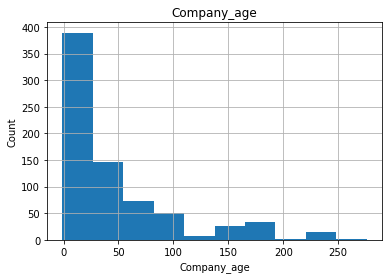

In [409]:
glassdoorjobs['Company_age'].hist()
plt.xlabel('Company_age')
plt.ylabel('Count')
plt.title('Company_age')

Text(0.5, 1.0, 'average_salary')

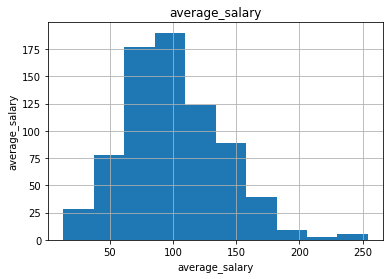

In [410]:
glassdoorjobs['average_salary'].hist()
plt.xlabel('average_salary')
plt.ylabel('average_salary')
plt.title('average_salary')

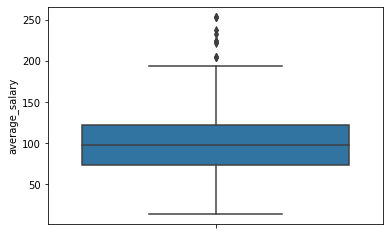

In [411]:
sns.boxplot(y='average_salary', orient='v', data=glassdoorjobs)

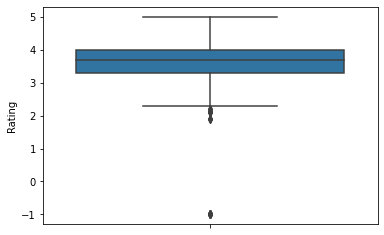

In [412]:
sns.boxplot(y='Rating', orient='v', data=glassdoorjobs)

In [413]:
corr_matrix=glassdoorjobs[['Company_age','average_salary','Rating']].corr()

glassdoorjobs['age'] = glassdoorjobs['Founded'],apply(lambda x: x.if x<1 else 2020-x)

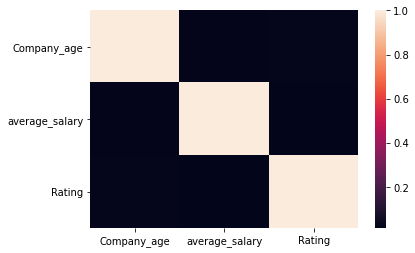

In [414]:
sns.heatmap(data=corr_matrix)

In [415]:
glassdoorjobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'max_salary', 'min_salary', 'average_salary', 'job_state',
       'Company_age', 'python_job', 'spark_job', 'excel_job', 'aws_job',
       'Job_Title_New'],
      dtype='object')

In [416]:
categorical_data = glassdoorjobs[['Company Name','Location','Headquarters','Type of ownership','Industry','Sector','Revenue','Job_Title_New','Size']]

Graph for Location
Total records = 20


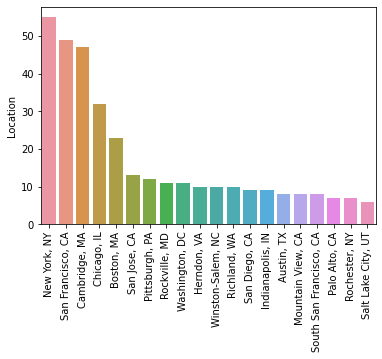

Graph for Headquarters
Total records = 20


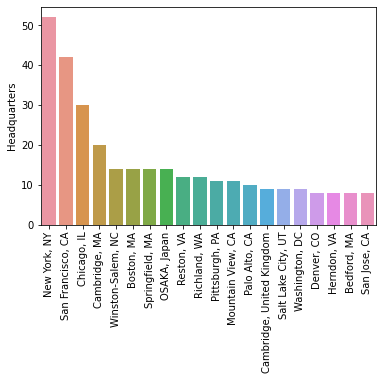

Graph for Company Name
Total records = 20


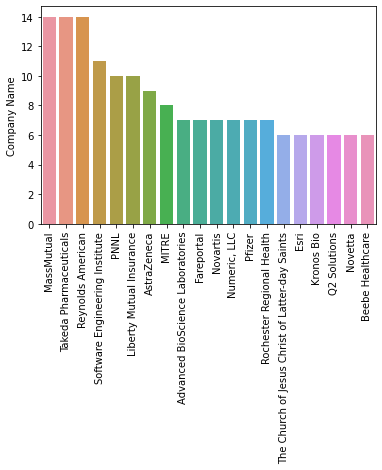

Graph for Size
Total records = 8


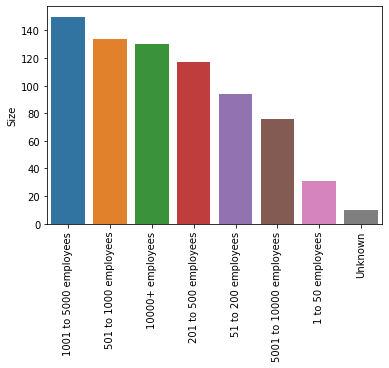

Graph for Type of ownership
Total records = 8


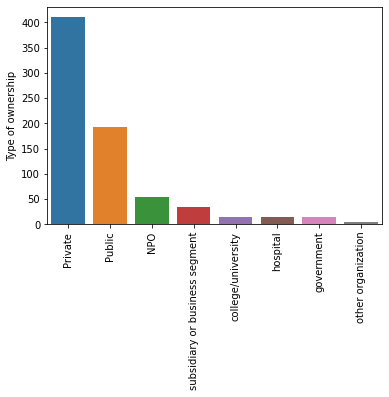

Graph for Revenue
Total records = 13


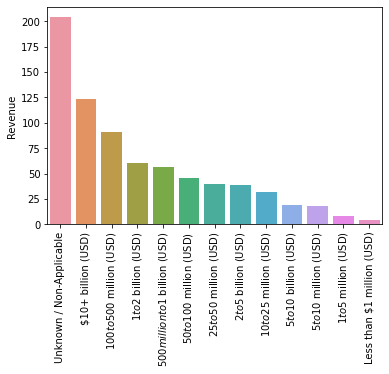

Graph for Industry
Total records = 20


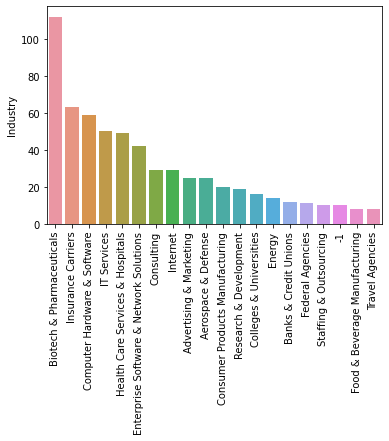

Graph for Sector
Total records = 20


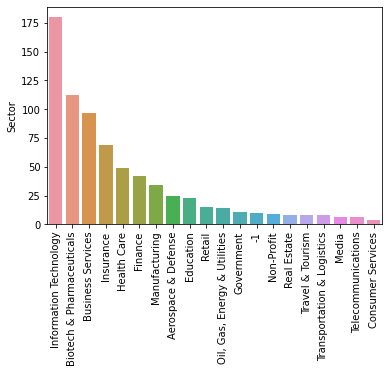

Graph for Job_Title_New
Total records = 7


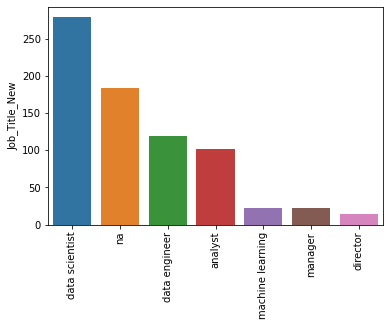

In [417]:
# Plotting the data for 'location' and 'Headquarters' columns
for i in ['Location', 'Headquarters','Company Name', 'Size', 'Type of ownership', 'Revenue','Industry', 'Sector','Job_Title_New']:
    unique_categories = categorical_data[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Feature Engineering

Trimming Column

In [418]:
# Trimming the 'Industry Column', taking 11 industries and replace by others

New_Industries = ['Biotech & Pharmaceuticals', 'Insurance Carriers', 'Computer Hardware & Software', 'IT Services', 'Health Care Services & Hospitals', 
                 'Enterprise Software & Network Solutions', 'Consulting', 'Internet', 'Advertising & Marketing', 'Aerospace & Defense', 'Consumer Products Manufacturing']

def industry_convert(text):
  if text not in New_Industries:
    return 'Others'
  else:
    return text

glassdoorjobs['Industry'] = glassdoorjobs['Industry'].apply(industry_convert)

In [419]:
# Trimming the 'job_state' column

# Taking top 10 States and replacing others by 'Others'
job_state_list = ['CA', 'MA', 'NY', 'VA', 'IL', 'MD', 'PA', 'TX', 'NC', 'WA']

def job_state_convert(text):
  if text not in job_state_list:
    return 'Others'
  else:
    return text

glassdoorjobs['job_state'] = glassdoorjobs['job_state'].apply(job_state_convert)

In [420]:
# Adding column of 'job_in_headquarters'
glassdoorjobs['job_headquarters'] = glassdoorjobs.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [421]:
glassdoorjobs.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'max_salary', 'min_salary', 'average_salary', 'job_state',
       'Company_age', 'python_job', 'spark_job', 'excel_job', 'aws_job',
       'Job_Title_New', 'job_headquarters'],
      dtype='object')

In [422]:
# Choosing relevant columns
glassdoorjobs_model = glassdoorjobs.copy(deep=True)


In [423]:
glassdoorjobs_model = glassdoorjobs_model[['average_salary','Job Title','Rating','Type of ownership', 'Industry', 'Revenue', 'Competitors','Size','Company_age',
                                          'Job_Title_New', 'job_headquarters','python_job', 'spark_job', 'excel_job', 'aws_job','job_state']]

In [424]:
glassdoorjobs_model.columns

Index(['average_salary', 'Job Title', 'Rating', 'Type of ownership',
       'Industry', 'Revenue', 'Competitors', 'Size', 'Company_age',
       'Job_Title_New', 'job_headquarters', 'python_job', 'spark_job',
       'excel_job', 'aws_job', 'job_state'],
      dtype='object')

# Handling Ordinal Categorical Features

In [425]:
# convert the 'Size' column into ordinal categorical features
company_size = {'Unknown': 0,'1 to 50 employees': 1,'51 to 200 employees': 2,'201 to 500 employees':3,'501 to 1000 employees':4,'1001 to 5000 employees':5,
                '5001 to 10000 employees':6,'10000+ employees':7}

In [426]:
glassdoorjobs_model['Company_Size'] = glassdoorjobs_model['Size'].map(company_size)
glassdoorjobs_model.drop(['Size'], axis=1,inplace=True)

In [427]:
# Mapping ranks to 'revenue	' columns since it is ordinal categorical feature
company_revenue = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11, '$10+ billion (USD)':12}

glassdoorjobs_model['Company_Revenue'] = glassdoorjobs_model['Revenue'].map(company_revenue)
glassdoorjobs_model.drop('Revenue', axis=True, inplace=True)

# Handling Nominal Categorical Features

In [428]:
# Convert 'Type of ownership' into dummy variables
glassdoorjobs_model = pd.get_dummies(columns=['Type of ownership'], data=glassdoorjobs_model)

In [429]:
# Convert 'Industry' into dummy variables 
glassdoorjobs_model = pd.get_dummies(columns=['Industry'], data=glassdoorjobs_model)

In [430]:
# Convert 'Job_Title_New' into dummy variables 
glassdoorjobs_model = pd.get_dummies(columns=['Job_Title_New'], data=glassdoorjobs_model)

In [431]:
# Convert 'Job_Title_New' into dummy variables 
glassdoorjobs_model = pd.get_dummies(columns=['job_state'], data=glassdoorjobs_model)

In [432]:
glassdoorjobs_model.shape

(742, 40)

In [433]:
glassdoorjobs_model.drop(['Job Title','Rating','Competitors'], axis=1, inplace=True)

In [434]:
glassdoorjobs_model.shape

(742, 37)

# Feature Scaling

In [435]:
glassdoorjobs_model.head()

,average_salary,Company_age,job_headquarters,python_job,spark_job,excel_job,aws_job,Company_Size,Company_Revenue,Type of ownership_NPO,Type of ownership_Private,Type of ownership_Public,Type of ownership_college/university,Type of ownership_government,Type of ownership_hospital,Type of ownership_other organization,Type of ownership_subsidiary or business segment,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Biotech & Pharmaceuticals,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Consumer Products Manufacturing,Industry_Enterprise Software & Network Solutions,Industry_Health Care Services & Hospitals,Industry_IT Services,Industry_Insurance Carriers,Industry_Internet,Industry_Others,Job_Title_New_analyst,Job_Title_New_data engineer,Job_Title_New_data scientist,Job_Title_New_director,Job_Title_New_machine learning,Job_Title_New_manager,Job_Title_New_na,job_state_Others
0,72.0,47,0,1,0,1,0,4,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,87.5,36,0,1,0,0,0,7,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,85.0,10,1,1,1,1,0,4,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,76.5,55,1,1,0,0,0,5,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,114.5,22,1,1,0,1,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [436]:
x = glassdoorjobs_model.drop(['average_salary'], axis=1)
y = glassdoorjobs_model['average_salary']

In [437]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['Company_age', 'Company_Size', 'Company_Revenue']
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

In [438]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("Training set size: {} and Testing set size: {}".format(x_train.shape, x_test.shape))

Training set size: (593, 36) and Testing set size: (149, 36)


In [439]:
glassdoorjobs_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   average_salary                                    742 non-null    float64
 1   Company_age                                       742 non-null    int64  
 2   job_headquarters                                  742 non-null    int64  
 3   python_job                                        742 non-null    int64  
 4   spark_job                                         742 non-null    int64  
 5   excel_job                                         742 non-null    int64  
 6   aws_job                                           742 non-null    int64  
 7   Company_Size                                      742 non-null    int64  
 8   Company_Revenue                                   742 non-null    int64  
 9   Type of ownership_NPO

# **Model Building**

# *Linear Regression*

In [441]:
# CREATING LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [442]:
# Fitting the dataset to the model
linear_model.fit(x_train, y_train)
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(round(linear_model.score(x_train, y_train),2)*100, round(linear_model.score(x_test, y_test),4)*100))

Accuracy of the Linear Regression Model on Training set is : 42.0% and on Test set is 40.08%


In [443]:
# Creating decision tree regression model
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(criterion='mse', max_depth=11, random_state=42)

In [444]:
# Fitting the dataset to the model
decision_model.fit(x_train, y_train)
print("Accuracy of the Decision Tree Regression Model on Training set is : {}% and on Test set is {}%".format(round(decision_model.score(x_train, y_train),4)*100, round(decision_model.score(x_test, y_test),4)*100))

Accuracy of the Decision Tree Regression Model on Training set is : 86.89% and on Test set is 52.22%


In [445]:
# Creating random forest regression model
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42)

In [446]:
# Fitting the dataset to the model
forest_model.fit(x_train, y_train)
print("Accuracy of the Random Forest Regression Model on Training set is : {}% and on Test set is {}%".format(round(forest_model.score(x_train, y_train),4)*100, round(forest_model.score(x_test, y_test),4)*100))

Accuracy of the Random Forest Regression Model on Training set is : 92.61% and on Test set is 69.48%


In [447]:
# Creating AdaBoost regression model
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=42)

In [448]:
# Fitting the dataset to the model
adb_model.fit(x_train, y_train)
print("Accuracy of the AdaBoost Regression Model on Training set is : {}% and on Test set is {}%".format(round(adb_model.score(x_train, y_train),4)*100, round(adb_model.score(x_test, y_test),4)*100))

Accuracy of the AdaBoost Regression Model on Training set is : 88.67% and on Test set is 68.23%
